In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [28]:
def plot_values(states, values):
    plt.ylim([-0.01,1])
    plt.plot(states, values)

In [29]:
def value_iteration(states, values, epsilon):
    policy = [0]
    for i in states[1:-1]:
        max_action = min(i, GOAL-i)
        actions = np.arange(1, max_action+1)
        new_val_i = 0
        all_values = [-epsilon + 0.6*values[i-action] + 0.4*values[i+action] for action in actions]
        values[i] = np.max(all_values)
        policy.append(np.argmax(all_values) + 1)
    policy.append(0)
    return values, policy

In [30]:
def simulate(policy, init_val):
    steps = 0
    cur_val = init_val
    while True:
        if cur_val == 0:
            return 0, steps
        elif cur_val == GOAL:
            return 1, steps
        flip = np.random.uniform()
        action = policy[cur_val]
        if flip < 0.6:
            cur_val -= action
        else:
            cur_val += action
        steps += 1

In [31]:
def stat_eval(policy, num_iter):
    steps_mean = []
    steps_var = []
    for init_val in range(GOAL + 1):
        steps = []
        for i in range(num_iter):
            _, step = simulate(policy, init_val)
            steps.append(step)
        steps_mean.append(np.mean(steps))
        steps_var.append(np.var(steps))
    return steps_mean, steps_var

In [32]:
def stat_eval(policy, num_iter):
    steps = np.zeros([num_iter, GOAL+1])
    for init_val in range(GOAL + 1):
        for i in range(num_iter):
            _, step = simulate(policy, init_val)
            steps[i, init_val] = step
    return steps

In [33]:
GOAL = 100
EPSILON = 1e-10
figsize = [20, 10]

In [34]:
# convergence from the other side
states = np.arange(0, GOAL + 1)
values = np.ones(GOAL + 1)
values[0] = 0
num_iter = 200

In [9]:
states = np.arange(0, GOAL + 1)
values = np.zeros(GOAL + 1)
values[GOAL] = 1
num_iter = 50

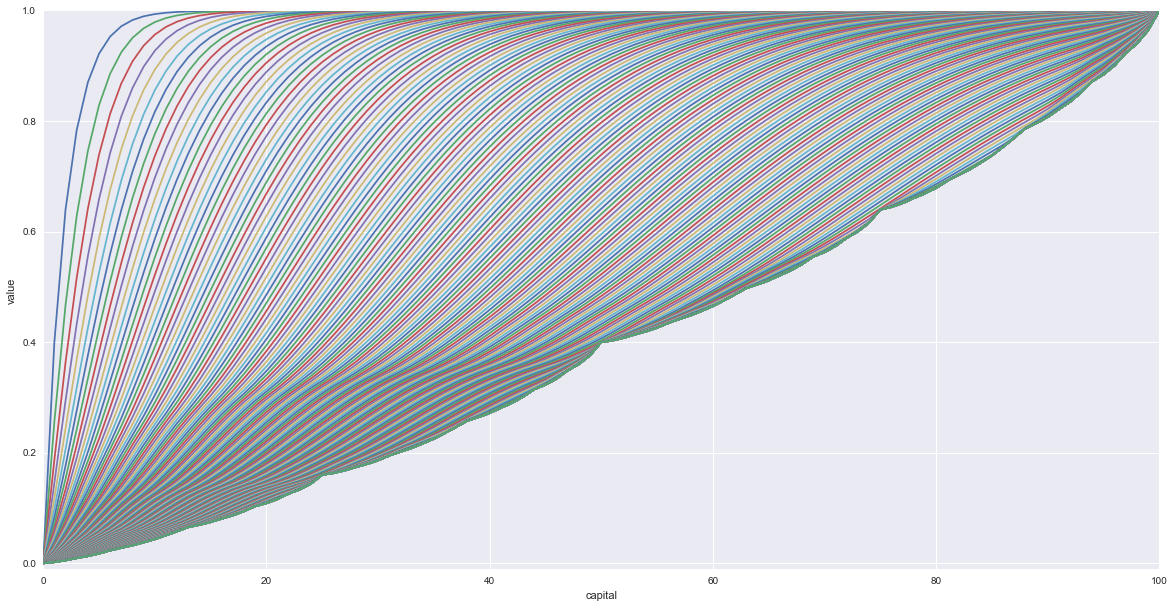

In [35]:
plt.figure(figsize=figsize)
for i in range(num_iter):    
    values, policy = value_iteration(states, values, EPSILON)
    plot_values(states, values)
plt.xlabel('capital')
plt.ylabel('value')
plt.show()

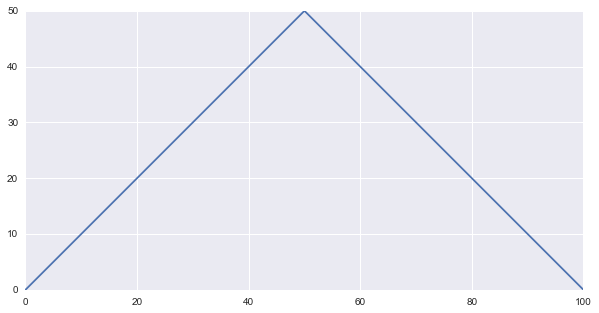

In [26]:
plt.figure(figsize=figsize)
plt.plot(policy)

In [12]:
part1 = range(50)
part2 = range(50)
part2.reverse()
parts = [part1, [50], part2]
policy1 = [a for part in parts for a in part]

In [13]:
part1 = range(1, 25)
part2 = range(1, 25)
part2.reverse()
parts = [[0], part1, [25], part2, [50], part1, [25], part2]
policy2 = [a for part in parts for a in part]

In [14]:
part1 = range(1, 13)
part2 = range(1, 13)
part2.reverse()
parts = [[0], part1, part2, [25], part1, part2, [50], part1, part2, [25], part1, part2, [0]]
policy3 = [a for part in parts for a in part]

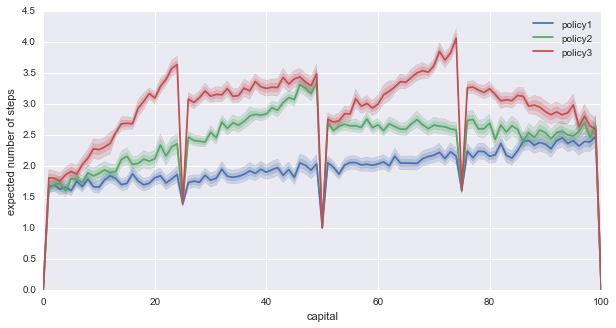

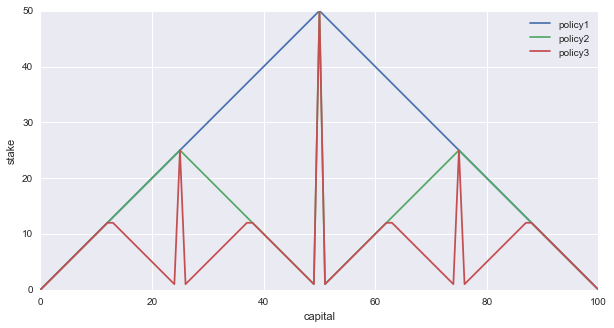

In [15]:
plt.figure(figsize=figsize)
policies = [policy1, policy2, policy3]
labels = ['policy1', 'policy2', 'policy3']
colors = {'policy1': 'b', 'policy2': 'g', 'policy3': 'r'}
for policy, label in zip(policies, labels):
    steps = stat_eval(policy, 500)
    sns.tsplot(data=steps, condition=label, color=colors, ci=[68, 95])
plt.legend(labels)
plt.xlabel('capital')
plt.ylabel('expected number of steps')

plt.figure(figsize=figsize)
for policy in policies:
    plt.plot(policy)
plt.legend(labels)
plt.xlabel('capital')
plt.ylabel('stake')

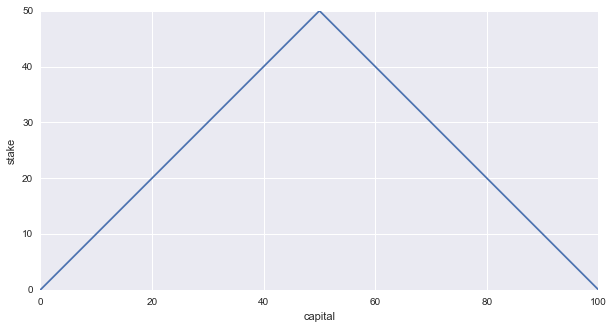

In [16]:
plt.figure(figsize=figsize)
plt.plot(policy1, 'b')
plt.xlabel('capital')
plt.ylabel('stake')